## Books Recommender System using Clustring | Collaborative based 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors 
import pickle 
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset  

In [2]:
ratings=pd.read_csv('D:\\Ml_complete_projects\\Book_recommender_system\\book dataset\\BX-Book-Ratings.csv',sep=';',encoding='latin-1')

In [3]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [5]:
books=pd.read_csv('D:\\Ml_complete_projects\\Book_recommender_system\\book dataset\\BX-Books.csv',sep=';',encoding='latin-1',on_bad_lines='skip')

In [6]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


# Data manipulation:- 

In [4]:

ratings.shape


(1149780, 3)

In [7]:
books.shape

(271360, 8)

In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [9]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
books.duplicated().sum()

0

In [11]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [12]:
books['Image-URL-L'].values

array(['http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg',
       'http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg',
       'http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg',
       ...,
       'http://images.amazon.com/images/P/006008667X.01.LZZZZZZZ.jpg',
       'http://images.amazon.com/images/P/0192126040.01.LZZZZZZZ.jpg',
       'http://images.amazon.com/images/P/0767409752.01.LZZZZZZZ.jpg'],
      dtype=object)

In [13]:
books=books[['Book-Title','ISBN','Book-Author','Year-Of-Publication','Publisher','Image-URL-L']]
books.head(2)


,Book-Title,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,Classical Mythology,0195153448,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,Clara Callan,0002005018,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...


In [14]:
books.rename( columns={'Book-Title':'title',
               'Book-Author':'author',
               'Year-Of-Publication':'year' ,
               'Publisher':'publisher',
                'Image-URL-L':'image_url'     
}
,inplace=True
)

In [15]:
books.head()

,title,ISBN,author,year,publisher,image_url
0,Classical Mythology,0195153448,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,Clara Callan,0002005018,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,Decision in Normandy,0060973129,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,Flu: The Story of the Great Influenza Pandemic...,0374157065,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,The Mummies of Urumchi,0393045218,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [16]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [17]:
ratings.rename(columns={'User-ID':'user_id','Book-Rating':'rating'},inplace=True)

In [18]:
ratings.head(1)

,user_id,ISBN,rating
0,276725,034545104X,0


In [19]:
ratings['user_id'].value_counts()

user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64

In [20]:
ratings['user_id'].nunique()

105283

* **Which means that the user ('11676') is the person who reads the most**
* **I've dropped users who only read or rated once because they don't help me much**

In [21]:
filter=ratings['user_id'].value_counts()

In [22]:
filter

user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64

In [23]:
users_filter=filter[filter>200]

In [24]:
users_filter

user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
274808      201
28634       201
59727       201
268622      201
188951      201
Name: count, Length: 899, dtype: int64

In [25]:
users_filter.shape

(899,)

In [26]:
users_index=users_filter.index

In [27]:
ratings=ratings[ratings['user_id'].isin(users_index)]

In [28]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [29]:
ratings.shape

(526356, 3)

In [30]:
books.head()

,title,ISBN,author,year,publisher,image_url
0,Classical Mythology,0195153448,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,Clara Callan,0002005018,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,Decision in Normandy,0060973129,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,Flu: The Story of the Great Influenza Pandemic...,0374157065,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,The Mummies of Urumchi,0393045218,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [31]:
books.shape

(271360, 6)

In [32]:
books['ISBN'].value_counts()

ISBN
0195153448    1
0746008481    1
0395219906    1
043916169X    1
0879235322    1
             ..
1568303823    1
0525947612    1
207036819X    1
2877306127    1
0767409752    1
Name: count, Length: 271360, dtype: int64

In [33]:
ratings['ISBN'].value_counts()

ISBN
0971880107    363
0316666343    270
0060928336    220
0440214041    218
0385504209    215
             ... 
0451211170      1
0451211073      1
0451210484      1
0451210476      1
9626344990      1
Name: count, Length: 207291, dtype: int64

In [34]:
ratings_with_book=ratings.merge(books,on='ISBN')

In [35]:
ratings_with_book

,user_id,ISBN,rating,title,author,year,publisher,image_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...
2,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...
...,...,...,...,...,...,...,...,...
487666,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...
487667,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...
487668,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...
487669,275970,4770019572,0,Musashi,Eiji Yoshikawa,1995,Kodansha International (JPN),http://images.amazon.com/images/P/4770019572.0...


In [36]:
print("ratings_with_book shape : ",ratings_with_book.shape)

ratings_with_book shape :  (487671, 8)


In [38]:
num_rating=ratings_with_book.groupby(['title'])['rating'].count().reset_index()

In [39]:
num_rating.head()

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [40]:
num_rating['rating'].unique()

array([  2,   1,   3,   5,   4,   7,  12,   8,  15,  10,  35,  13,  21,
         9,   6,  38,  11,  76, 162,  47,  40,  25,  41, 124,  22,  29,
        32,  71,  24,  20,  54,  43,  19,  46, 115,  17,  77,  14,  23,
        16,  85,  61,  50,  42,  18,  53,  34,  28,  63,  30,  27,  55,
        67, 140,  49,  33,  65, 119, 228,  57,  31, 137,  39,  37,  78,
       210,  69,  97,  60,  51,  81,  56,  64,  48, 103,  83, 127,  26,
        84, 134,  94,  92,  68, 193,  58,  70,  62,  90, 105,  95,  86,
        66, 132, 118, 111,  79, 108,  74,  52,  44, 123,  36, 104, 277,
        73,  93,  88, 121,  45, 110, 120, 122,  59,  91, 109, 100,  72,
       161,  80,  87,  89,  99,  98, 131,  82, 135, 174, 183, 112, 125,
       138, 101,  96, 177, 175, 116, 185, 136,  75, 145, 146, 212, 143,
       130, 113, 149, 151, 128, 206, 117, 188, 142, 169, 179, 224, 107,
       227, 200, 213, 129, 181, 270, 230, 241, 159, 236, 163, 171, 133,
       148, 180, 168, 209, 186, 182, 126, 150, 114, 363], dtype=

In [43]:
num_rating.rename(columns={'rating':'num_rating'},inplace=True)

In [44]:
num_rating.head(2)

,title,num_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1


In [45]:
print(num_rating.shape)
print(ratings_with_book.shape)

(160269, 2)
(487671, 8)


In [46]:
final_data_frame=ratings_with_book.merge(num_rating,on='title')

In [47]:
final_data_frame

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,7
2,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,1
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,1
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,13
...,...,...,...,...,...,...,...,...,...
487666,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,1
487667,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...,1
487668,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...,1
487669,275970,4770019572,0,Musashi,Eiji Yoshikawa,1995,Kodansha International (JPN),http://images.amazon.com/images/P/4770019572.0...,1


In [48]:
# filter final data frame 
final_data_frame=final_data_frame[final_data_frame['num_rating']>=50]


In [49]:
final_data_frame

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
13,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,133
15,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,108
18,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,108
24,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,79
...,...,...,...,...,...,...,...,...,...
487505,275970,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031354.0...,84
487506,275970,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031362.0...,60
487579,275970,1573229725,0,Fingersmith,Sarah Waters,2002,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,59
487618,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,146


In [50]:
final_data_frame.reset_index(drop=True,inplace=True)

In [51]:
final_data_frame.head(30)

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,133
2,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,108
3,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,108
4,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,79
5,277427,0140067477,0,The Tao of Pooh,Benjamin Hoff,1983,Penguin Books,http://images.amazon.com/images/P/0140067477.0...,77
6,277427,014029628X,0,Girl in Hyacinth Blue,Susan Vreeland,2000,Penguin Books,http://images.amazon.com/images/P/014029628X.0...,91
7,277427,014100018X,0,Chocolat,Joanne Harris,2000,Penguin Books,http://images.amazon.com/images/P/014100018X.0...,103
8,277427,0142001740,0,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,209
9,277427,0312966091,0,Three To Get Deadly : A Stephanie Plum Novel (...,Janet Evanovich,1998,St. Martin's Paperbacks,http://images.amazon.com/images/P/0312966091.0...,105


In [52]:
final_data_frame.duplicated(['user_id','title']).sum()

2003

In [53]:
final_data_frame.drop_duplicates(['user_id','title'],inplace=True)

In [54]:
print(final_data_frame.shape)
print(final_data_frame.duplicated(['user_id','title']).sum())

print(final_data_frame.duplicated(['title','image_url']).sum())


(59850, 9)
0
57697


<Axes: xlabel='rating', ylabel='count'>

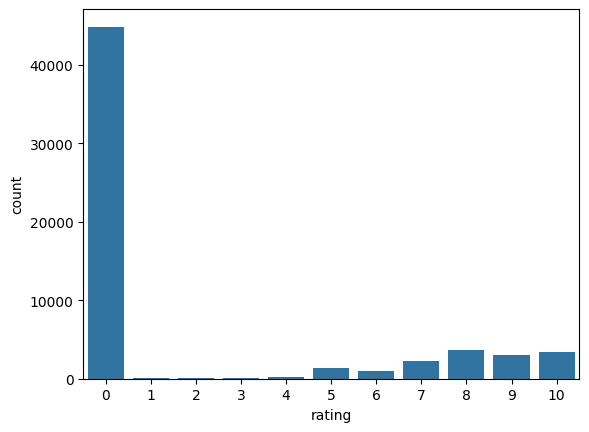

In [55]:
sns.countplot(final_data_frame,x='rating')

In [56]:
book_pivot=final_data_frame.pivot(columns='user_id',index='title',values='rating')

In [57]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [58]:
book_pivot.fillna(0,inplace=True)

In [59]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
book_sparse=csr_matrix(book_pivot)

# Model Evaluation 

In [63]:
model=NearestNeighbors(algorithm='brute')

In [64]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [65]:
distance,suggesitions=model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1))

In [66]:
distance

array([[ 0.        , 67.75691847, 68.05145112, 72.277244  , 75.81556568]])

In [67]:
suggesitions

array([[237, 238, 240, 241, 184]], dtype=int64)

In [68]:
book_pivot.index[0]

'1984'

In [69]:
for i  in suggesitions:
    print(book_pivot.index[i])
    


Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive'],
      dtype='object', name='title')


In [70]:
book_name=book_pivot.index

In [71]:
print(book_name)

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       '84 Charing Cross Road', 'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Cry In The Night',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=742)


In [73]:
pickle.dump(model,open('D:\Ml_complete_projects\Book_recommender_system\saving\model.pkl','wb'))

In [74]:
pickle.dump(book_name,open('D:\\Ml_complete_projects\\Book_recommender_system\\saving\\book_name.pkl','wb'))

In [75]:
pickle.dump(final_data_frame,open('D:\\Ml_complete_projects\\Book_recommender_system\\saving\\final_data_frame.pkl','wb'))

In [76]:
pickle.dump(book_pivot,open('D:\\Ml_complete_projects\\Book_recommender_system\\saving\\book_pivot.pkl','wb'))

# Model Test

In [77]:
suggesitions

array([[237, 238, 240, 241, 184]], dtype=int64)

In [78]:
suggesitions[0]

array([237, 238, 240, 241, 184], dtype=int64)

In [81]:
print(book_pivot.index[suggesitions[0]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive'],
      dtype='object', name='title')


In [100]:
def fetch_poster(suggesitions):
     book_name=[]
     ids_index=[]
     poster_url=[]
     for book_id in suggesitions[0]:
          book_name.append(book_pivot.index[book_id])
     for  name in book_name :
         ids=np.where(final_data_frame['title']==name)[0][0]
         ids_index.append(ids)
     for idx in ids_index:
          print(idx)
          url=final_data_frame.loc[idx, 'image_url']
          poster_url.append(url)
    #poster_url  
     return  poster_url 

In [101]:
 fetch_poster(suggesitions)

44
321
45
46
786


['http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0375727345.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0439136369.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/043936213X.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0316096199.01.LZZZZZZZ.jpg']

In [102]:
final_data_frame.loc[50,'image_url']

'http://images.amazon.com/images/P/0440213991.01.LZZZZZZZ.jpg'

In [95]:
def recommend(book_name):
    book_list=[]
    book_id=np.where(book_pivot.index==book_name)[0][0]
    
    distance,suggesitions=model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1))
    poster_url=fetch_poster(suggesitions)

    for books_id in suggesitions :
         
         for j in books_id :
              book_list.append(book_pivot.index[j])
    
    return book_list ,poster_url  

In [96]:
recommendation_books,urls= recommend('1984')

332
22
76
521
497


In [97]:
urls

['http://images.amazon.com/images/P/0425092917.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0345404777.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0553280368.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0440234743.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/037570504X.01.LZZZZZZZ.jpg']